# ORIE 4580/5580 Assignment 6

#### Students: Chenxin Fang (cf348) and Aaron Ye (ajy33)

### Github link: [example Github link](https://github.com/MelindaFang-code/orie4580/blob/main/HW6%20(1).ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [ ]:
import numpy as np
def getCI(sims, N):
  mean = sum(sims)/N
  std = np.std(sims)
  l = 1.96*std/np.sqrt(N)
  print("mean = ", mean)
  print("95% CI = ", mean-l, mean+l)

In [ ]:

import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

Sum of poisson distribution is also poisson distribution. \
Let N be the number of arrivals within 12 hours. Then N follows Poisson distribution with rate
$∫_0^{12} \frac{1}{56}\left(5t^3-90t^2+300t+1480\right) = 240$ \\


In [ ]:
from scipy.stats import poisson
#probability that see smaller or equal to 250 customers
prob = poisson.cdf(250, 240)
1 - prob

0.24711253205956696

The exact probability is thus 0.247

___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



$ \frac{d}{dt}\lambda(t)=\frac{1}{56}\left(15t^2-180t+300\right) = 0$ \\
$ (t-2)(t-10) = 0$ \\
t = 2 or 10



In [ ]:
max_lambda = 0
l = lambda x: (5*pow(x,3)-90*pow(x,2)+300*x+1480)/56
for x in range(1,13):
  max_lambda = max(max_lambda, l(x))
print(max_lambda)

31.428571428571427


In [ ]:
N = 500
counter = 0

for _ in range(N):
  n = 0
  T_star = 0

  while T_star <= 12:
    a = np.random.exponential(scale=1/max_lambda)
    T_star += a
    u = np.random.rand()
    if T_star <= 12 and u <= l(T_star)/max_lambda:
      n += 1

  counter += n > 250
p = counter/N
width = 1.96*np.sqrt(p*(1-p)/N)
print("mean = ", p)
print("95% CI = ", p-width, p+width)

mean =  0.244
95% CI =  0.20635330286997278 0.2816466971300272


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

In [ ]:
from collections import defaultdict
N = 500
counter = 0
sims = defaultdict(int)
for _ in range(N):
  n = 0
  T_star = 0
  # sims.append(defaultdict(int))
  while T_star <= 12:
    a = np.random.exponential(scale=1/max_lambda)
    T_star += a
    u = np.random.rand()
    if T_star <= 12 and u <= l(T_star)/max_lambda:
      n += 1
      sims[int(T_star)] += 1

  counter += n > 250


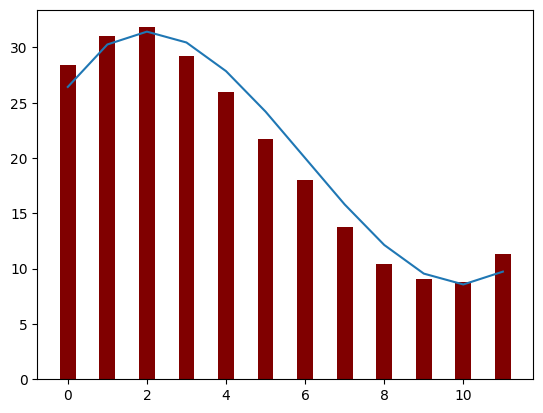

In [ ]:
X = np.arange(0, 12)
Y = [v/N for v in sims.values()]
f = [l(x) for x in X]
plt.bar(X, Y, color ='maroon',
        width = 0.4)
plt.plot(X, f)




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


In [ ]:
from types import new_class

N = 1000
def simulator(n, N):
  sims = []
  for i in range(N):
    seen = set()
    sims.append(0)
    while len(seen) < n:
      seen.add(np.random.randint(n, size=1)[0])
      sims[-1] += 1
  getCI(sims, N)

for n in [10, 20, 40, 60, 80, 100]:
  print("number of songs = ", n)
  simulator(n, N)


number of songs =  10
mean =  29.777
95% CI =  29.092948007039233 30.46105199296077
number of songs =  20
mean =  72.236
95% CI =  70.79495299735005 73.67704700264996
number of songs =  40
mean =  173.316
95% CI =  170.25558182367337 176.37641817632664
number of songs =  60
mean =  278.354
95% CI =  273.7880477223196 282.91995227768035
number of songs =  80
mean =  393.548
95% CI =  387.7754377288284 399.3205622711716
number of songs =  100
mean =  517.491
95% CI =  509.72003726309083 525.2619627369091


Let $X$ be the number of draws needed to go over all songs. Let $x_i$ be the number of songs to go over to hear the i-th song after i-1 songs have been played. The probability of hearing the i-th song is $\frac{n-i+1}{n}$, so $x_i$ has geometric distribution with p = $\frac{n-i+1}{n}$, the mean of $x_i$ is thus $\frac{1}{p}=\frac{n}{n-i+1}$. Then by linearity of expectation, $X = x_1 + x_2 +.. + x_n = \sum_{i=1}^{n}\frac{n}{n-i+1} = n(1+\frac{1}{2}+\frac{1}{3}+...+\frac{1}{n}) = nH_n\text{, where Hn is the nth harmonic number}$


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [ ]:
n = 10
N = 1000
def simulator2(n,N):
  sims = []
  for i in range(N):
    seen = set()
    # sims.append([])
    counter = 0
    # stop = False
    while True:
      curr = np.random.randint(n, size=1)[0]
      counter += 1
      if curr in seen:
        sims.append(counter)
        break
      else:
        seen.add(curr)
  return sims

In [ ]:
for n in [10, 20, 40, 60, 80, 100]:
  print("number of songs = ", n)
  sims = simulator2(n, N)
  # print(sims)
  getCI(sims, N)

number of songs =  10
mean =  4.625
95% CI =  4.517175502783458 4.732824497216542
number of songs =  20
mean =  6.382
95% CI =  6.222045794173457 6.541954205826542
number of songs =  40
mean =  8.756
95% CI =  8.513177720745398 8.998822279254602
number of songs =  60
mean =  10.354
95% CI =  10.054109213788752 10.653890786211246
number of songs =  80
mean =  11.94
95% CI =  11.587219600544474 12.292780399455525
number of songs =  100
mean =  13.08
95% CI =  12.707364874226812 13.452635125773188


___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

In [ ]:
def simulator3(N):
  n = 20
  sims = []
  for i in range(N):
    seen = set()
    curr = 1
    last = 1
    while len(seen) < n:
      last = curr
      seen.add(curr)
      prob = np.random.rand()
      val = 1 if prob > 0.5 else -1
      curr = (curr + val + n)%n
    sims.append(last)
  return sims

Counter({13: 584, 9: 574, 10: 555, 11: 551, 16: 544, 2: 542, 8: 537, 19: 529, 5: 529, 3: 518, 12: 516, 6: 512, 18: 511, 7: 510, 17: 509, 0: 506, 4: 501, 15: 497, 14: 475})


(array([506.,   0., 542., 518., 501., 529., 512., 510., 537., 574., 555.,
        551., 516., 584., 475., 497., 544., 509., 511., 529.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

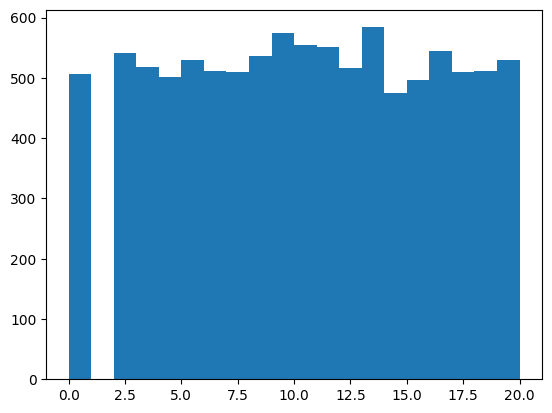

In [ ]:
from collections import Counter

sims = simulator3(10000)
print(Counter(sims))
plt.hist(sims, bins=range(0, 21))

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

1c, they are all symmetrical since its a random walk.

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [116]:
total = 100
trials = 1000
res = []
probs = [0.3, 0.5, 0.8]
for a in probs:
  # res.append([])
  counter = 0
  for _ in range(trials):
    A = total*a
    while A > 0 and A < total:
      curr = np.random.rand()
      if curr <= 0.5:
        A += 1
      else:
        A -= 1
    counter += A == 0
    # res[-1].append(counter)
  res.append(counter)

for i, a in enumerate(probs):
  print("A's asset is", a, "of total asset")
  print(res[i]/trials)

A's asset is 0.3 of total asset
0.647
A's asset is 0.5 of total asset
0.51
A's asset is 0.8 of total asset
0.202


Analytical Solution: A has probability of winning = a/(a+b) \\
Assume the number of rounds for A or B to win is N. Let $S_n$ be the asset at time n, $x_i$ be the result of 1 round, it is -1 if a wins and 1 if a loses, $p$ be the probability that a wins \\
$E[S_n] = E[pa + (1-p)b] = 0$ \\
$p = \frac{b}{a+b}$ \\

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

In [ ]:
total = 100
trials = 1000
res = []
probs = [0.3, 0.5, 0.8]
for a in probs:
  res.append([])
  for _ in range(trials):
    A = total*a
    counter = 0
    while A > 0 and A < total:
      counter += 1
      curr = np.random.rand()
      if curr <= 0.5:
        A += 1
      else:
        A -= 1

    res[-1].append(counter)

for i, a in enumerate(probs):
  print("A's asset is", a, "of total asset")
  getCI(res[i], trials)



A's asset is  0.3 of total asset
mean =  2084.22
95% CI =  1966.7605272460555 2201.679472753944
A's asset is  0.5 of total asset
mean =  2505.628
95% CI =  2380.2584855146292 2630.997514485371
A's asset is  0.8 of total asset
mean =  1694.334
95% CI =  1572.773993684146 1815.894006315854


Analytical Solution: E[N] = ab \\
$E[S_n] = 0$ \\
$E[S_n^2] = Var[S_n] - (E[S_n])^2 = Var[S_n] = \sum_{i=0}^nvar[x_i] = n$ \\
$E[S_n^2 - N] = E[S_n^2] - E[N] = a^2p + b^2(1-p) - E[N] = 0$ \\
plug in p = $\frac{b}{a+b}$ \\
$\frac{a^2b}{a+b} + \frac{b^2a}{a+b} - E[N] = 0 $ \\
$\frac{(a+b)ab}{a+b} = E[N]$ \\
E[N] = ab

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim(mu, trials):
  res = np.zeros(trials)

  for x in range(trials):
    myT = np.random.exponential(scale=1/mu)
    friendT = 0
    count = 0
    while friendT < myT:
      friendT = np.random.exponential(scale=1/mu)
      count += 1
    res[x] = count
  return res

def getStats(res):
  t = len(res)
  avg = res.mean()
  std = res.std()/np.sqrt(t)
  lo = avg - 1.96*std
  hi = avg + 1.96*std
  print(f'trials = {t} 95% CI: [{lo}, {hi}]')
  return avg, lo, hi

In [ ]:
trials = 100
mu = 0.5
res = sim(mu, trials)

getStats(res)

trials = 100 95% CI: [2.2723532483525037, 4.587646751647497]


(3.43, 2.2723532483525037, 4.587646751647497)

___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

trials = 100 95% CI: [3.1460700652667883, 16.973929934733214]
trials = 500 95% CI: [3.4118333562097694, 5.35216664379023]
trials = 1000 95% CI: [-15.924736258076504, 76.6527362580765]
trials = 1500 95% CI: [3.3486771544128136, 20.541989512253856]
trials = 2000 95% CI: [6.5288918400588525, 14.406108159941146]
trials = 2500 95% CI: [-101.03334813816464, 342.95414813816467]
trials = 3000 95% CI: [5.55613804211665, 12.533195291216682]
trials = 3500 95% CI: [-0.641352749137404, 31.128209891994548]
trials = 4000 95% CI: [-9.32400240804196, 68.06300240804195]
trials = 4500 95% CI: [6.836297031019794, 13.64014741342465]
trials = 5000 95% CI: [6.09659821994298, 9.16780178005702]
trials = 5500 95% CI: [7.249946360041767, 12.540599094503689]
trials = 6000 95% CI: [-59.35390795543731, 215.34390795543732]
trials = 6500 95% CI: [4.611567192046183, 20.083509731030738]
trials = 7000 95% CI: [-84.30125797152846, 299.52554368581417]
trials = 7500 95% CI: [4.993182080094619, 15.962284586572046]
trials = 

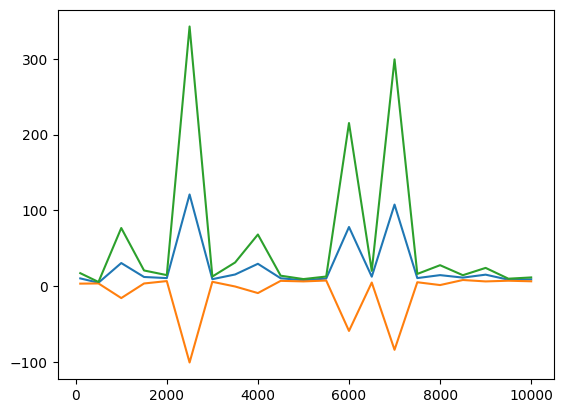

In [ ]:
trials = [100]
for i in range(500, 10000+1, 500):
  trials.append(i)

lower, upper, mid = [], [], []

mu = 0.5
for x in trials:
  res = sim(mu, x)
  avg, lo, hi = getStats(res)
  mid.append(avg)
  lower.append(lo)
  upper.append(hi)

plt.plot(trials, mid)
plt.plot(trials, lower)
plt.plot(trials, upper)
plt.show()


## Ans.


___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans

$x_i$ is of $Exp(λ)$ \
probability of x_i being larger is $1 - F_x$, so the expected number of queries is $\frac{1}{1-F_x}$ \
$\int_0^{∞}f_x\frac{1}{1-F_x}dx = \int_0^{∞}\lambda(e^{-\lambda x})\frac{1}{e^{-\lambda x}}dx = \int_0^{∞}\lambda dx = ∞$